In [1]:
import os
from glob import glob
import pickle

import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = glob('../src/data/SeaFog/*.csv')

In [3]:
data_dir.sort()

In [4]:
data_dir

['../src/data/SeaFog/302_증산도.csv',
 '../src/data/SeaFog/771_불무기도.csv',
 '../src/data/SeaFog/772_장도.csv',
 '../src/data/SeaFog/789_목포구.csv']

In [5]:
col_list = ['지점 기온(°C)',
'수온(°C)',
'강수량 1분(mm)',
'풍속(m/s)',
'u',
'v',
"현지기압(hPa)",
'해면기압(hPa)',
'습도(%)',
'일사(MJ/m^2)',
'일조(Sec)',
'T',
'해기차(T-SST)',
'이슬점온도(°C)',
'기온',
'이슬점온도(T-Td)',
'수온',
'이슬점온도(°C)',
'vis']


In [6]:
col = ['기온(°C)',
 '수온(°C)',
 '풍속(m/s)',
 'u',
 'v',
 '습도(%)',
 '해기차(T-SST)',
 '이슬점온도(°C)',
 '기온-이슬점온도(T-Td)',
 '수온-이슬점온도(°C)',
 'vis']

In [7]:
new_col = ['t', 'st', 'ws', 'u', 'v', 'h', 'astd', 
          'dp', 't-dp', 'st-dp', 'vis']

In [8]:
temp_1 = []
temp_2 = []
target_col_name = []

for ii, _dir in enumerate(data_dir):
    data = pd.read_csv(_dir, index_col=0, encoding='cp949')
    island_name = data['지점'][0]
    data = data[data.index >= '2019-12-14 09:00:00']
    data.drop('지점', axis=1, inplace=True)
    data.drop('해면기압(hPa)', axis=1, inplace=True)
    
    data.drop('일사(MJ/m^2)', axis=1, inplace=True)
    data.drop('일조(Sec)', axis=1, inplace=True)
    data.drop('1분 강수량(mm)', axis=1, inplace=True)
    data.drop('현지기압(hPa)', axis=1, inplace=True)
    data.drop('T', axis=1, inplace=True)
        
    df_1 = data[data.index <= '2021-06-01 23:50:00']
    df_2 = data[data.index >= '2021-07-01 00:00:00']


    col_name_change = {col[i]:str(island_name)+'_'+new_col[i] for i in range(len(new_col))}
    
    df_1.rename(columns=col_name_change, inplace=True)
    df_2.rename(columns=col_name_change, inplace=True)
    

    target_col_name.append(str(island_name)+'_vis')
        
    temp_1.append(df_1)
    temp_2.append(df_2)

/Users/juhyeonkim/opt/anaconda3/envs/GSL/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
dataframe_1 = pd.DataFrame()

for df in temp_1:
    dataframe_1 = pd.concat([dataframe_1, df], axis=1)
    
dataframe_2 = pd.DataFrame()

for df in temp_2:
    dataframe_2 = pd.concat([dataframe_2, df], axis=1)

In [10]:
dataframe_1.dropna(inplace=True)
dataframe_2.dropna(inplace=True)

In [11]:
dataframe_1.index = pd.to_datetime(dataframe_1.index)
dataframe_2.index = pd.to_datetime(dataframe_2.index)

In [13]:
for col in target_col_name:
    print(dataframe_2[col])

time
2021-07-01 11:20:00    13070.0
2021-07-01 11:30:00    15420.0
2021-07-01 11:40:00    15170.0
2021-07-01 11:50:00    13350.0
2021-07-01 12:00:00    14250.0
                        ...   
2022-06-30 23:10:00    20000.0
2022-06-30 23:20:00    20000.0
2022-06-30 23:30:00    20000.0
2022-06-30 23:40:00    20000.0
2022-06-30 23:50:00    20000.0
Name: 302_vis, Length: 45445, dtype: float64
time
2021-07-01 11:20:00    13180.0
2021-07-01 11:30:00    15830.0
2021-07-01 11:40:00    15950.0
2021-07-01 11:50:00    16950.0
2021-07-01 12:00:00    20000.0
                        ...   
2022-06-30 23:10:00    20000.0
2022-06-30 23:20:00    20000.0
2022-06-30 23:30:00    20000.0
2022-06-30 23:40:00    20000.0
2022-06-30 23:50:00    20000.0
Name: 771_vis, Length: 45445, dtype: float64
time
2021-07-01 11:20:00    13500.0
2021-07-01 11:30:00    15030.0
2021-07-01 11:40:00    12870.0
2021-07-01 11:50:00    15170.0
2021-07-01 12:00:00    18180.0
                        ...   
2022-06-30 23:10:00    1865

count    4.544500e+04
mean     3.443546e+04
std      3.805241e+05
min      6.000000e+01
25%      1.418000e+04
50%      2.000000e+04
75%      2.000000e+04
max      8.189999e+06
Name: 302_vis, dtype: float64


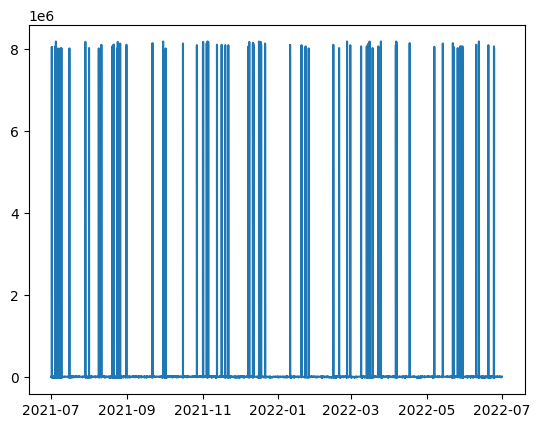

count    4.544500e+04
mean     2.917913e+04
std      3.121737e+05
min      1.000000e+01
25%      1.637000e+04
50%      2.000000e+04
75%      2.000000e+04
max      8.189999e+06
Name: 771_vis, dtype: float64


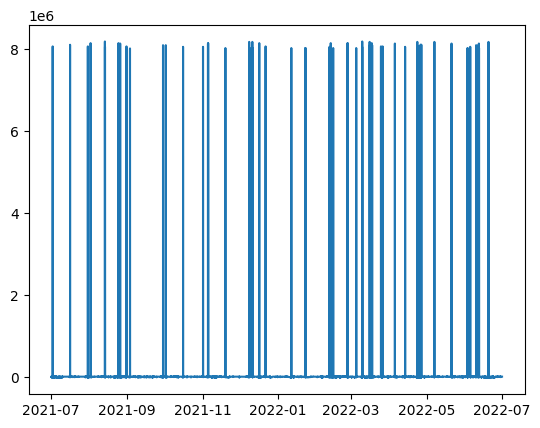

count    4.544500e+04
mean     3.170809e+04
std      3.514242e+05
min      1.000000e+01
25%      1.379000e+04
50%      2.000000e+04
75%      2.000000e+04
max      8.189999e+06
Name: 772_vis, dtype: float64


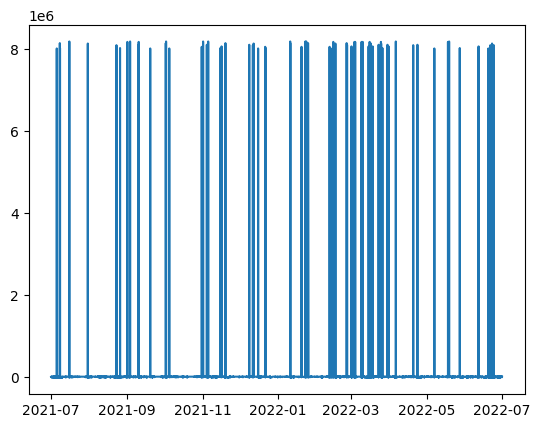

count    4.544500e+04
mean     2.642983e+04
std      2.672516e+05
min      9.000000e+01
25%      1.743000e+04
50%      2.000000e+04
75%      2.000000e+04
max      8.189999e+06
Name: 789_vis, dtype: float64


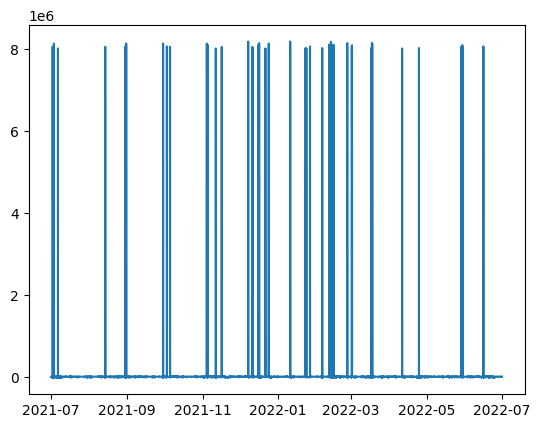

In [12]:
for col in target_col_name:
    print(dataframe_2[col].describe())
    plt.plot(dataframe_2[col])
    plt.show()